In [78]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt, dates as mdates
import japanize_matplotlib
import datetime as dt
# 県名の英語/日本語対応
EN_pref = ['ALL', 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Tokyo', 'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa', 'Fukui', 'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 
           'Shiga', 'Kyoto', 'Osaka', 'Hyogo', 'Nara','Wakayama','Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki','Kagoshima','Okinawa']
JP_pref = ["全国", '北海道', '青森県', '岩手県', '宮城県', '秋田県', '山形県', '福島県', '茨城県', '栃木県', '群馬県', '埼玉県', '千葉県', '東京都', '神奈川県', '新潟県', '富山県', '石川県', '福井県', '山梨県', '長野県',  '岐阜県', '静岡県', '愛知県', '三重県',
           '滋賀県', '京都府', '大阪府', '兵庫県', '奈良県', '和歌山県', '鳥取県', '島根県', '岡山県', '広島県', '山口県', '徳島県', '香川県', '愛媛県', '高知県', '福岡県', '佐賀県', '長崎県', '熊本県', '大分県', '宮崎県', '鹿児島県', '沖縄県'] 
regions = [['Hokkaido', 'Aomori', 'Akita', 'Iwate', 'Miyagi', 'Yamagata', 'Fukushima'],
           ['Tokyo', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Kanagawa'],
           ['Niigata', 'Toyama', 'Ishikawa', 'Fukui','Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi'],
           ['Kyoto', 'Osaka', 'Mie', 'Shiga', 'Hyogo', 'Nara', 'Wakayama'],
           ['Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi'],
           ['Tokushima', 'Kagawa', 'Ehime', 'Kochi'],
           ['Fukuoka', 'Saga', 'Nagasaki', 'Oita', 'Kumamoto', 'Miyazaki', 'Kagoshima', 'Okinawa']]
JP_pref_of = dict(zip(EN_pref, JP_pref))
# 厚労省CSVを読込む
# 新規感染者
new_case = pd.read_csv('https://covid19.mhlw.go.jp/public/opendata/newly_confirmed_cases_daily.csv')
new_case["Date"] = pd.to_datetime(new_case["Date"])
new_case = new_case.set_index("Date")

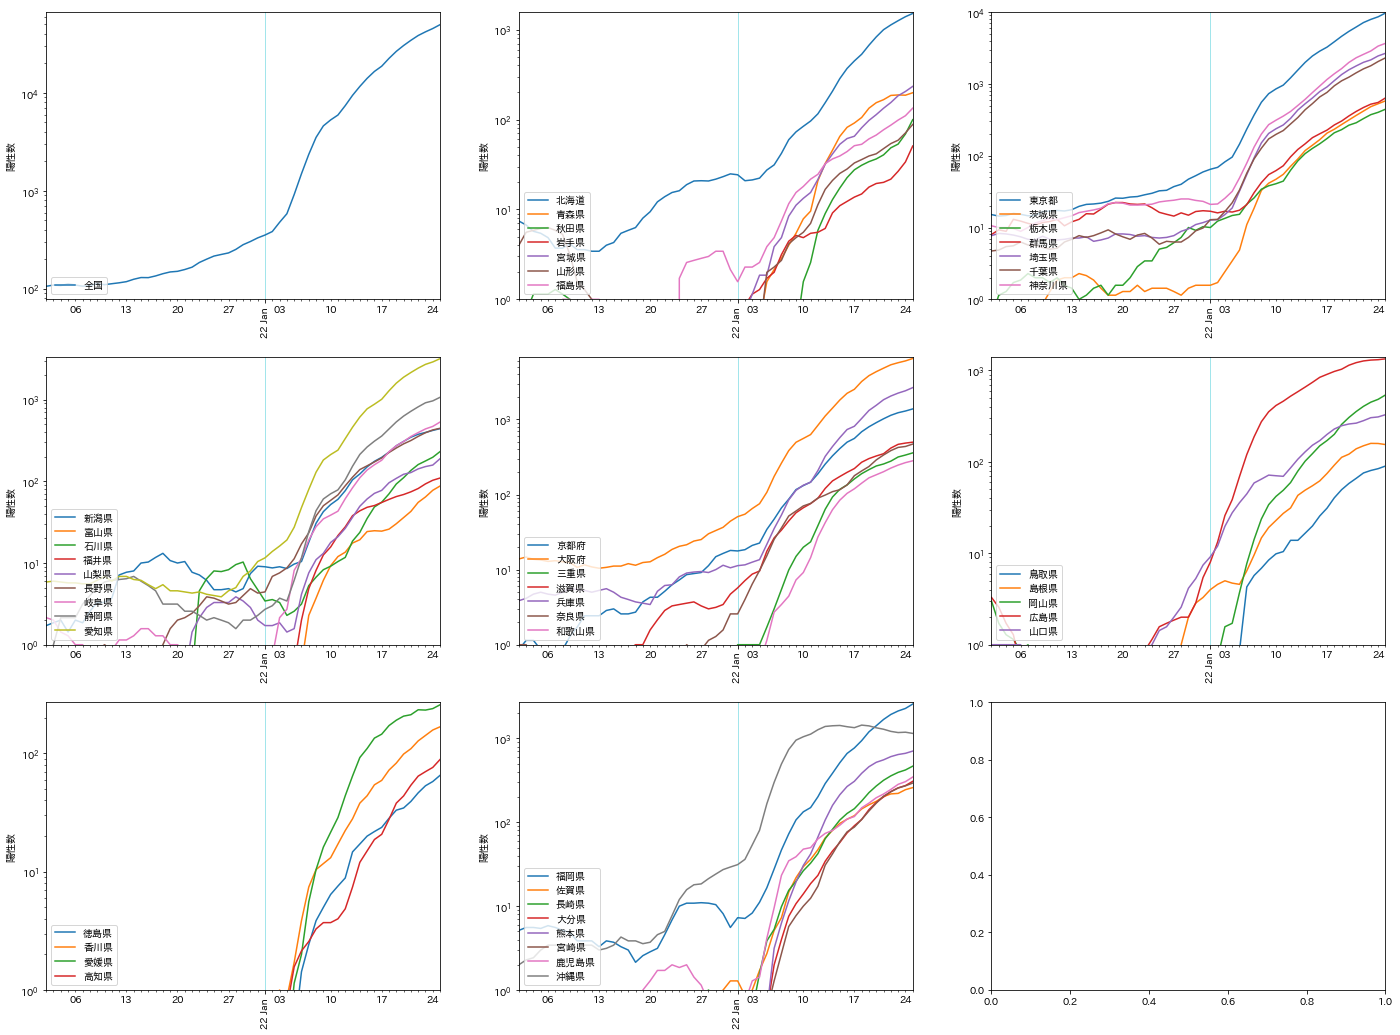

In [79]:
#nc2022=new_case[new_case.index>dt.datetime(2021,11,23)].rolling(7).mean().dropna()
nc2022 = new_case.rolling(7).mean().dropna()
nc2022 = nc2022[nc2022.index>dt.datetime(2021,12,1)]
fig, axs = plt.subplots(3,3,figsize=(8*3,6*3))
axs = axs.flatten()
for rid in range(len(regions)+1):
    ax = axs[rid]
    if rid == 0:
        nc2022["ALL"].plot(ax=ax, label=JP_pref_of["ALL"])
    else:
        region_df = nc2022[regions[rid-1]]
        region_df.columns = [JP_pref_of[p] for p in regions[rid-1]]
        region_df.plot(ax=ax)
        ax.set_ylim([1,ax.get_ylim()[1]])
    ax.set_yscale('log')
    ax.set_xlabel("")
    ax.set_ylabel("陽性数")
    ax.legend(loc='lower left')
    ax.xaxis.set_major_locator(mdates.MonthLocator()) # 主目盛りを月ごとに設定
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%y %b")) # 主目盛りの表示を英語の月名短縮形にする
    ax.grid(which='major', axis='x', linestyle='-', color='tab:cyan', alpha=0.5) # 主目盛りのグリッドを水色にして，半透明にする
    plt.setp(ax.get_xticklabels(which='major'), rotation=90)

#axs[-1].axis('off')
plt.savefig('2022-01-27_daily_new_test_positive.png', bbox_inches='tight')
plt.show()

In [42]:
EN_pref = ['ALL', 'Hokkaido', 'Aomori', 'Iwate', 'Miyagi', 'Akita', 'Yamagata', 'Fukushima', 'Ibaraki', 'Tochigi', 'Gunma', 'Saitama', 'Chiba', 'Tokyo', 'Kanagawa', 'Niigata', 'Toyama', 'Ishikawa', 'Fukui', 'Yamanashi', 'Nagano', 'Gifu', 'Shizuoka', 'Aichi', 'Mie', 
           'Shiga', 'Kyoto', 'Osaka', 'Hyogo', 'Nara','Wakayama','Tottori', 'Shimane', 'Okayama', 'Hiroshima', 'Yamaguchi', 'Tokushima', 'Kagawa', 'Ehime', 'Kochi', 'Fukuoka', 'Saga', 'Nagasaki', 'Kumamoto', 'Oita', 'Miyazaki','Kagoshima','Okinawa']


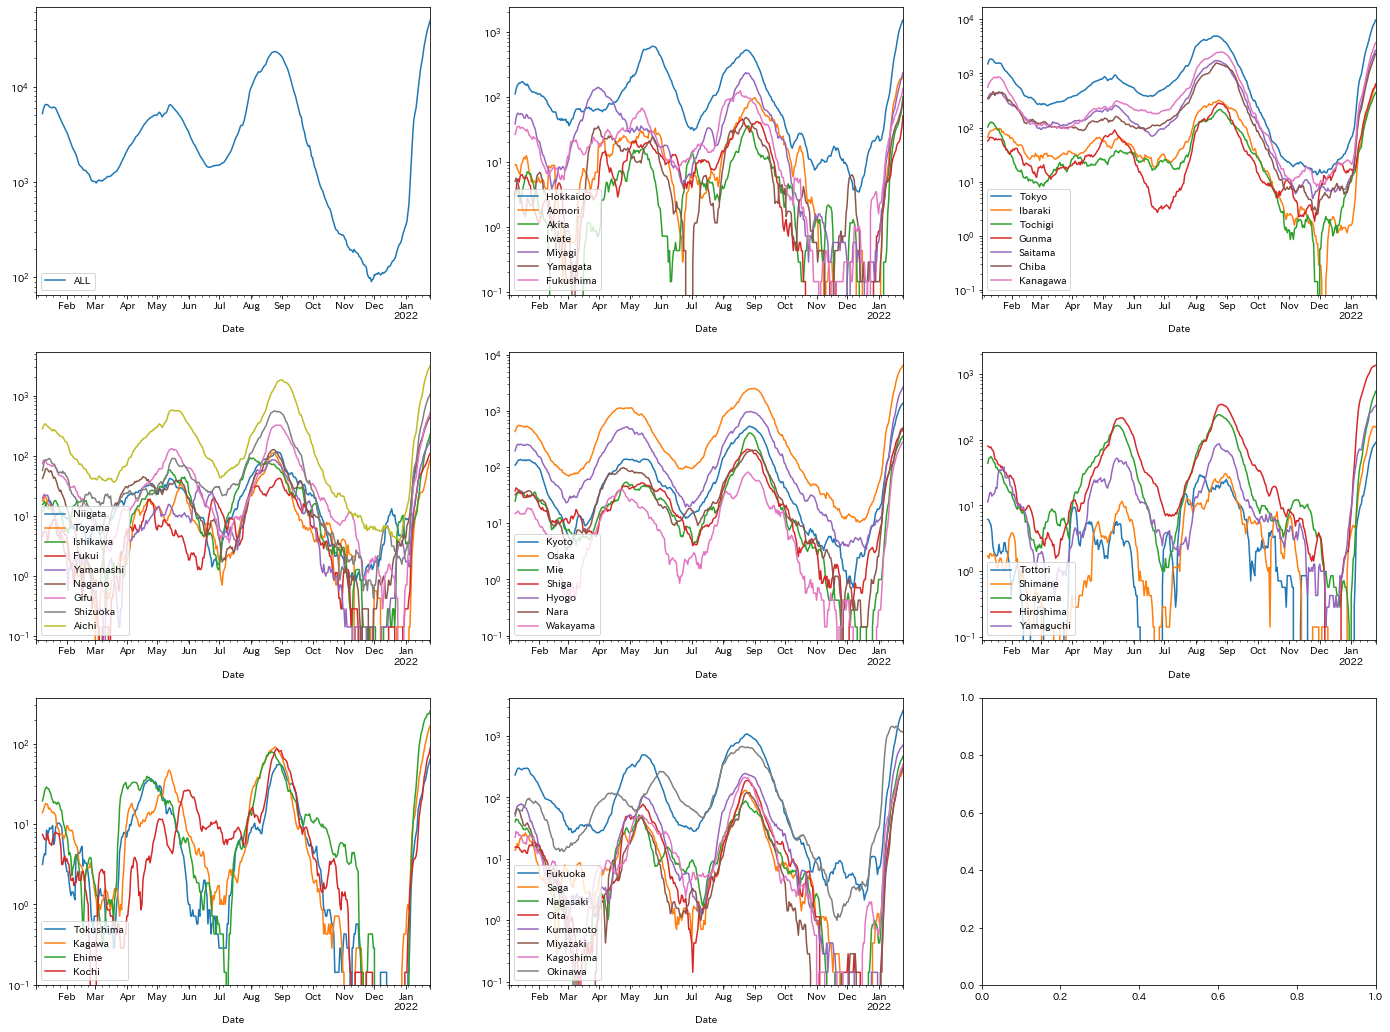